# Series temporales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from prophet import Prophet

In [10]:
raw_csv_data = pd.read_csv("datasets/Index2018.csv")

In [11]:
df_comp = raw_csv_data.copy()  # SE COPIA POR MANTENER LOS DATOS ORIGINALES CARA A FUTURO

In [ ]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)  # SE CONVIERTE LA COLUMNA DATE A TIPO DATETIME
df_comp.set_index("date", inplace=True)  # SE ESTABLECE LA COLUMNA DATE COMO INDICE
df_comp=df_comp.asfreq('D')  # SE ESTABLECE LA FRECUENCIA DE LOS DATOS A DIARIO, ESTOS DEBEN SER CONSTANTES PARA HACER EL ANALISIS
df_comp=df_comp.asfreq('B') 

In [12]:
df_comp.head() # PRECIO DE CIERRE DE LOS INDICADORES. SE TOMA LA INFORMACION POR DIA - INDICES BURSATILES

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [13]:
df_comp.isna() #comprobamos valores faltantes - missing values

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [14]:
df_comp.isna().sum() #sumamos los valores faltantes por columna

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Graficos basicos

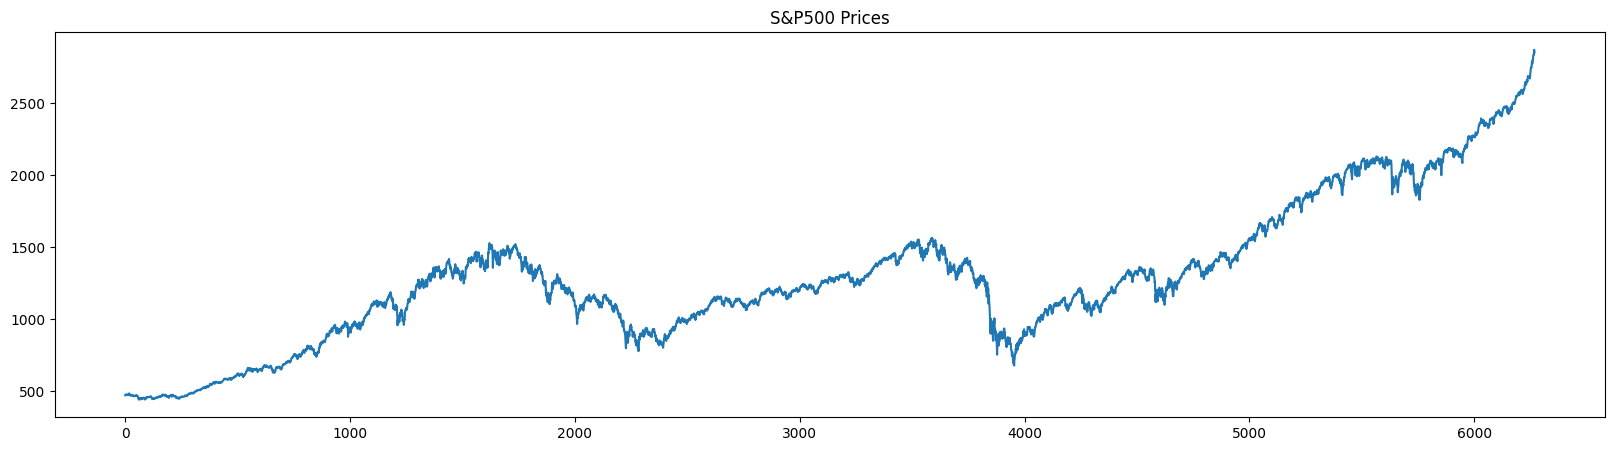

In [15]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices") #figsize = tamaño de la grafica
plt.show()

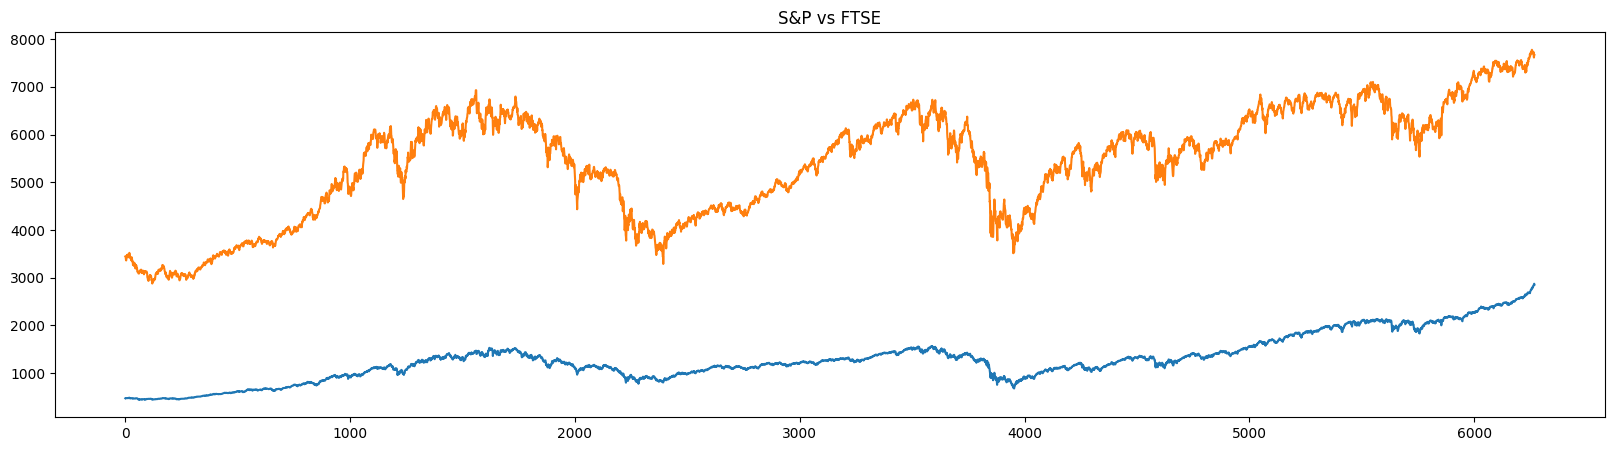

In [16]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P vs FTSE")
plt.show() #se pueden graficar varias columnas a la vez para realizar comparaciones

## Técnicas de suavizado

### SMA: Simple Moving Average - Promedio Móvil Simple

In [18]:
df_sma = pd.DataFrame()

df_sma['spx'] = df_comp['spx']
df_sma['3-month-SMA'] = df_comp['spx'].rolling(window=3).mean()
df_sma['6-month-SMA'] = df_comp['spx'].rolling(window=6).mean()
df_sma['12-month-SMA'] = df_comp['spx'].rolling(window=12).mean()

# la funcion rolling permite seleccionar la ventana temporal (window)
# luego obtenemos la media

In [19]:
df_sma.head(15)

,spx,3-month-SMA,6-month-SMA,12-month-SMA
0,469.90,NaN,NaN,NaN
1,475.27,NaN,NaN,NaN
2,474.13,473.100000,NaN,NaN
3,474.17,474.523333,NaN,NaN
4,472.47,473.590000,NaN,NaN
5,474.91,473.850000,473.475000,NaN
6,473.30,473.560000,474.041667,NaN
7,474.25,474.153333,473.871667,NaN
8,474.30,473.950000,473.900000,NaN
9,474.98,474.510000,474.035000,NaN


<Axes: >

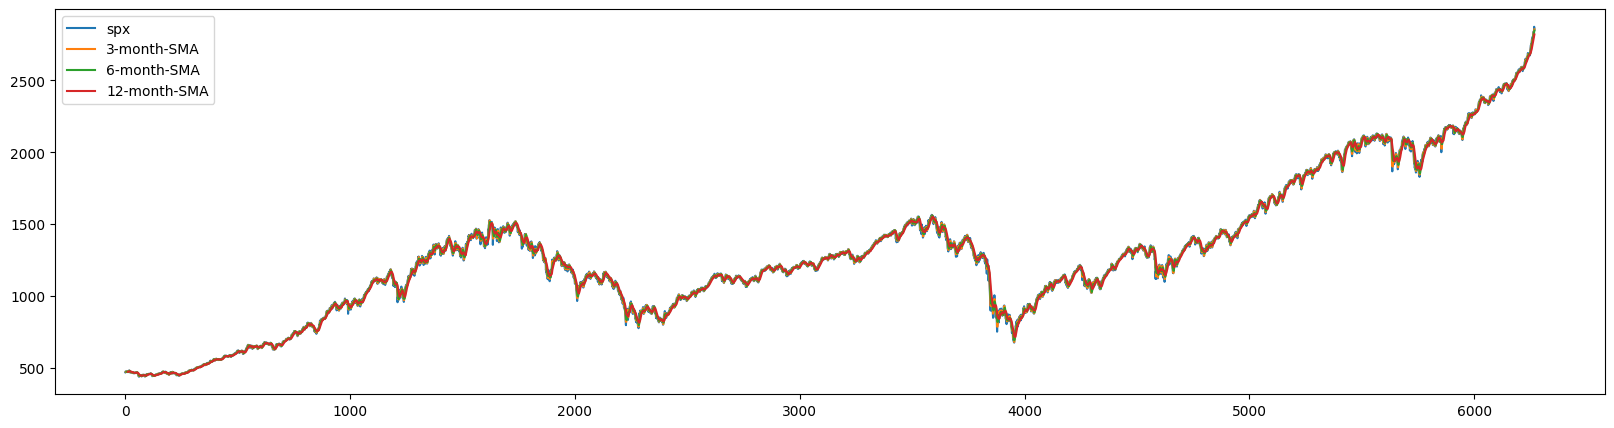

In [26]:
df_sma.plot(figsize=(20,5))

### EWMA: Exponential Weighted Moving Average - Promedio movil ponderado exponencialmente 
Se tiene que pasar el valor de alfa entre 0 y 1, cuanto mas cerca de 1 menos efecto tendra, cuando mas cerca de 0 mas anulara los picos. 

In [27]:
df_sma['EWMA-8'] = df_sma['spx'].ewm(alpha=0.8,adjust=True).mean()
df_sma['EWMA-5'] = df_sma['spx'].ewm(alpha=0.5,adjust=True).mean()
df_sma['EWMA-1'] = df_sma['spx'].ewm(alpha=0.1,adjust=True).mean()

In [28]:
df_sma.head()

,spx,3-month-SMA,6-month-SMA,12-month-SMA,EWMA-8,EWMA-5,EWMA-1
0,469.90,NaN,NaN,NaN,469.900000,469.900000,469.900000
1,475.27,NaN,NaN,NaN,474.375000,473.480000,472.726316
2,474.13,473.100000,NaN,NaN,474.177419,473.851429,473.244280
3,474.17,474.523333,NaN,NaN,474.171474,474.021333,473.513463
4,472.47,473.590000,NaN,NaN,472.809859,473.220645,473.258655


<Axes: >

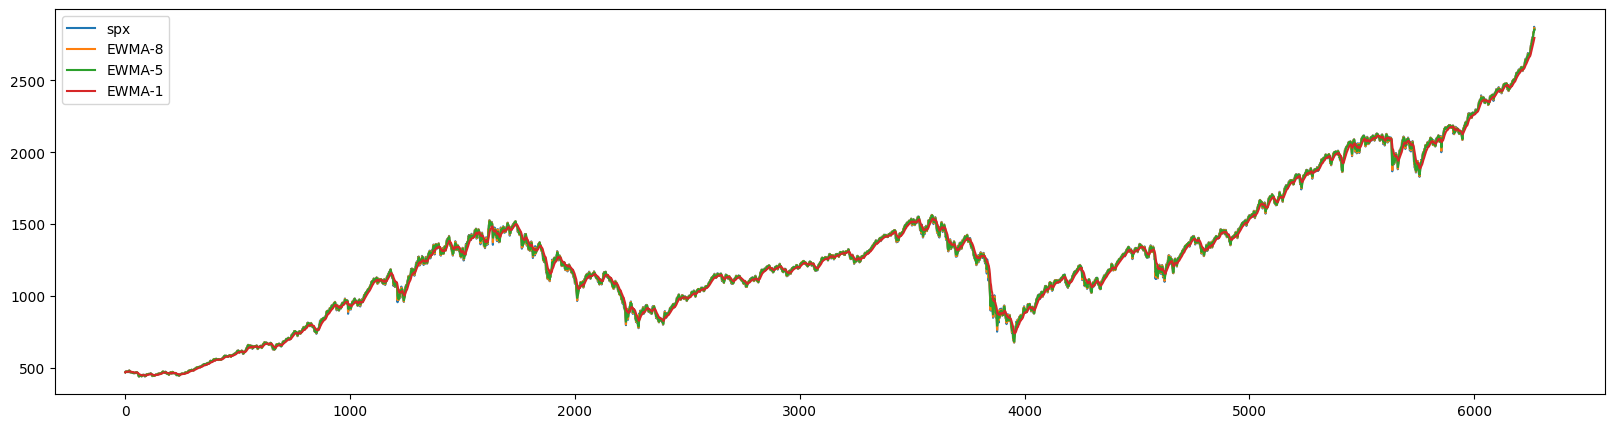

In [29]:
df_sma[['spx','EWMA-8','EWMA-5','EWMA-1']].plot(figsize=(20,5))

## Prophet 

In [ ]:
df_prop = pd.DataFrame()
df_prop['ds'] = df_comp['date']
df_prop['y'] = df_comp['spx']

model = Prophet()
model.fit(df_prop)

In [ ]:
future = model.make_future_dataframe(periods=100, freq = 'm')
future.tail()

In [ ]:
forecast = model.predict(future)
forecast.tail()

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# grafica del resultado de la predicción
model.plot(forecast)